In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
#Importing necessary Libraries

In [2]:
df_edges = pd.read_csv("graph1.csv")
print(df_edges)
#checking for the proper reading of dataframe

    From_Node  To_Node
0           1        2
1           1        3
2           2        4
3           2        5
4           3        5
5           3        6
6           3        7
7           4        8
8           4        9
9           5       10
10          5       11
11          6       12
12          6       13
13          7       14
14          7       15
15          3       11


In [3]:
G = nx.Graph() #creating a networkX graph

df_edges = pd.read_csv("graph1.csv")
# Adding nodes and edges from the DataFrame
for _, row in df_edges.iterrows():
    from_node = row['From_Node']
    to_node = row['To_Node']
    
    # Add nodes
    if from_node not in G.nodes:
        G.add_node(from_node)
    if to_node not in G.nodes:
        G.add_node(to_node)
    
    # Adding edges
    G.add_edge(from_node, to_node)

# Printing basic information about the graph
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())


Number of nodes: 15
Number of edges: 16


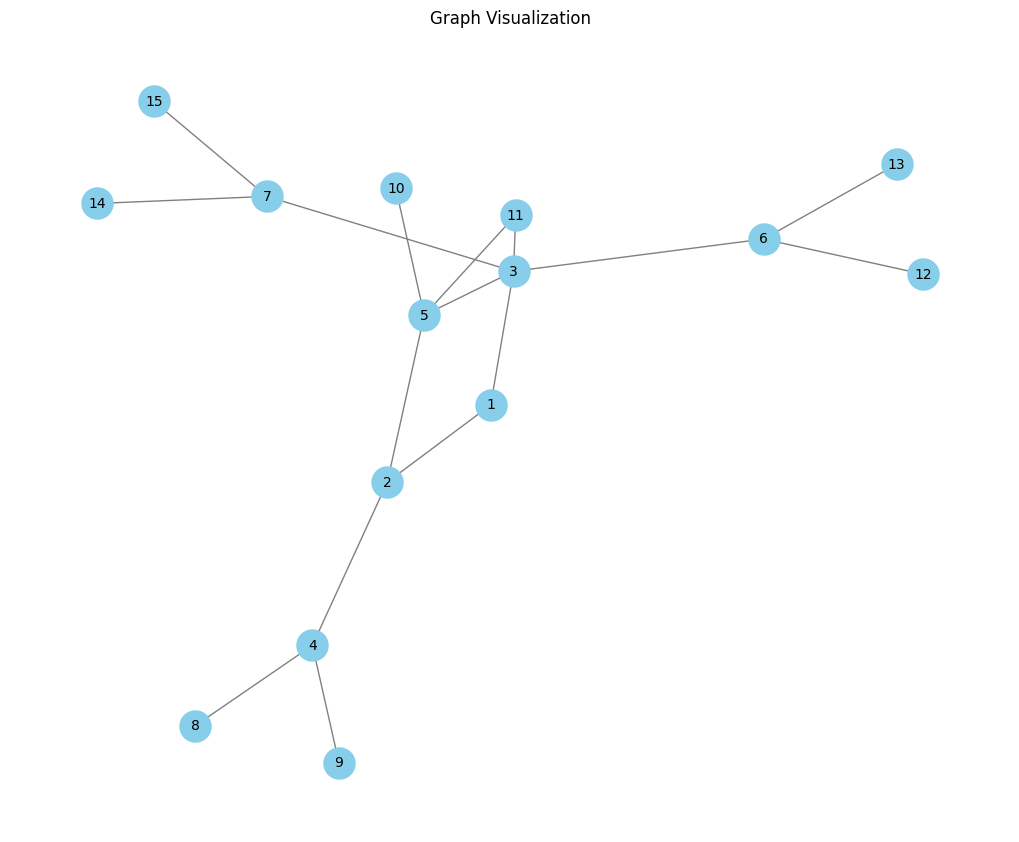

In [4]:
import matplotlib.pyplot as plt

#basic visualisation using matplotlib
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_size=500, node_color="skyblue", font_size=10, font_color="black", edge_color="gray")
plt.title("Graph Visualization")
plt.show()

In [5]:
#CHOOSING SIMILAR NODE
import networkx as nx
import math
import plotly.graph_objects as go
import random
import pandas as pd

# Define function to choose the most similar node
def choose_sim_node(G, last_node):
    max_score = -1
    sim_node = None
    for u in G.neighbors(last_node):
        score = sim(G, u, last_node)
        if score > max_score:
            max_score = score
            sim_node = u
    
    # if sim_node is not None:
    #     print(f"sim_node: {sim_node}, Similarity score: {max_score:.4f}")
    # else:
    #     print("No similar node found.")
    
    return sim_node

# Define similarity function
def sim(G, u, last_node):
    N_u = set(G.neighbors(u))
    N_v = set(G.neighbors(last_node))
    
    # print(f"Neighbors of {u}: {N_u}")
    # print(f"Neighbors of {last_node}: {N_v}")
    
    numerator = len(N_u.intersection(N_v))
    denominator = math.sqrt(len(N_u) * len(N_v)) #not according to given algorithm
    
    # print(f"Intersection: {N_u.intersection(N_v)}")
    # print(f"Numerator: {numerator}, Denominator: {denominator}")
    
    if denominator == 0:
        return 0
    return numerator / denominator

# Choose a random node
last_node = random.choice(list(G.nodes))
print(f"Randomly chosen node: {last_node}")

# Find the most similar node
print("Similar node is",choose_sim_node(G, last_node))

Randomly chosen node: 15
Similar node is 7


In [6]:
#EXPLORING PATHS
def explore_paths(G, last_node, max_depth=6):
    all_paths = []
    for u in G.neighbors(last_node):
        exploring_path = [last_node, u]
        current_node = u
        depth = 1  # Initialize depth counter
        while depth < max_depth:  # Check if max depth is reached
            # print(f"Current path: {exploring_path}")
            sim_node = choose_sim_node(G, current_node)
            # print(f"Most similar to {current_node}: {sim_node}")
            if sim_node is not None and sim_node not in exploring_path:
                exploring_path.append(sim_node)
                current_node = sim_node
                depth += 1  # Increment depth
            else:
                break  # Stop if no similar node found or cycle detected
        all_paths.append(exploring_path)
    return all_paths

# Usage
max_depth = 6
print("The path(s) corresponding to last node",explore_paths(G, last_node, max_depth))

The path(s) corresponding to last node [[15, 7, 3, 11, 5]]


In [7]:
# Function to choose centroids based on paths in the graph
def choose_centroids(G, all_paths):
    # Dictionary to store paths for each centroid node
    cens_paths = {}
    
    # Iterate through all paths
    for path in all_paths:
        # Skipping paths that are too short to have two distinct nodes
        if len(path) < 2:
            continue
        
        # Getting the last two nodes in the path
        node1 = path[-2]
        node2 = path[-1]
        
        # Comparing the degrees of the last two nodes to determine the centroid
        if G.degree(node1) > G.degree(node2):
            centroid_node = node1
        elif G.degree(node1) < G.degree(node2):
            centroid_node = node2
        else:
            # If degrees are equal, choose the node with the higher ID
            centroid_node = max(node1, node2)
        
        # If the centroid node is not already in the dictionary, add it
        if centroid_node not in cens_paths:
            cens_paths[centroid_node] = []
        
        # Appending the current path to the list of paths for this centroid
        cens_paths[centroid_node].append(path)
    
    # Returning the dictionary of centroids and their paths
    return cens_paths

# Explore_paths is a function that generates paths from the graph G
all_paths = explore_paths(G, last_node, max_depth)

# Printing the possible centroids with their corresponding paths
print("The possible centroids with path are", choose_centroids(G, all_paths))


The possible centroids with path are {5: [[15, 7, 3, 11, 5]]}


In [8]:
# Function to combine paths for each centroid
def combine_paths(cens_paths):
    # Dictionary to store combined sets of nodes for each centroid
    cens_seeds = {}
    
    # Iterate through each centroid and its paths
    for cen, paths in cens_paths.items():
        # Create a set to hold the combined nodes from all paths
        combined_set = set()
        
        # Update the set with nodes from each path
        for path in paths:
            combined_set.update(path)
        
        # Store the combined set in the dictionary
        cens_seeds[cen] = combined_set
    
    # Return the dictionary of centroids and their combined node sets
    return cens_seeds

# Function to get the first centroid from the combined sets
def get_first_centroid(cens_seeds):
    return next(iter(cens_seeds))

# Get centroids and their paths
cens_paths = choose_centroids(G, all_paths)
print("The centroids with their combined respective path is", combine_paths(cens_paths))

# Get the combined result
combined_result = combine_paths(cens_paths)


The centroids with their combined respective path is {5: {3, 5, 7, 11, 15}}


In [9]:
import networkx as nx
import numpy as np

# Function to detect community based on centroid seeds
def detect_community(G, cens_seeds, last_node, cen):
    # Initialize the probability vector for Personalized PageRank
    def initialize_probability_vector(G, cens_seeds, last_node, cen):
        p0 = np.zeros(len(G))  # Initialize probability vector
        nodes = list(G.nodes())  # List of graph nodes
        seed_nodes = list(cens_seeds.get(cen, []))  # Get seed nodes for centroid
        for node in set(seed_nodes + [last_node, cen]):  # Ensure no duplicates
            if node in nodes:
                p0[nodes.index(node)] = 1
        return p0 / np.sum(p0) if np.sum(p0) > 0 else p0  # Normalize

    # Perform Personalized PageRank
    def personalized_pagerank(G, p0, alpha=0.85, max_iter=100, tol=1e-6):
        p = p0.copy()
        nodes = list(G.nodes())
        for _ in range(max_iter):
            prev_p = p.copy()
            for i, node in enumerate(nodes):
                neighbors = list(G.neighbors(node))
                if neighbors:
                    p[i] = (1 - alpha) * p0[i] + alpha * sum(prev_p[nodes.index(neigh)] / G.degree(neigh) for neigh in neighbors)
            if np.linalg.norm(p - prev_p, 1) < tol:  # Check convergence
                break
        return p

    # Calculate conductance of a set of nodes
    def conductance(G, S):
        S = set(S)
        vol_S = sum(G.degree(node) for node in S)
        cut_S = sum(1 for u, v in G.edges() if (u in S) != (v in S))
        vol_G = sum(dict(G.degree()).values())
        denominator = min(vol_S, vol_G - vol_S)
        return cut_S / denominator if denominator > 0 else float('inf')

    # Perform sweep operation to find best community
    def sweep_operation(G, p):
        nodes = list(G.nodes())
        sorted_indices = np.argsort(p)[::-1]
        best_conductance = float('inf')
        best_community = []
        current_community = []
        for i in sorted_indices:
            current_community.append(nodes[i])
            cond = conductance(G, current_community)
            if cond < best_conductance:
                best_conductance = cond
                best_community = current_community.copy()
        return best_community

    # Step 1: Initialize probability vector
    p0 = initialize_probability_vector(G, cens_seeds, last_node, cen)

    # Step 2: Apply Personalized PageRank
    p = personalized_pagerank(G, p0)

    # Step 3 & 4: Perform sweep operation and return community
    C = sweep_operation(G, p)

    return C

# Combine paths to get seeds
cens_seeds = combine_paths(cens_paths)

# Get the first centroid
cen = get_first_centroid(combined_result)

# Detect community
community = detect_community(G, cens_seeds, last_node, cen)

# Print detected community
print("Detected community:", community)


Detected community: [3, 7, 5, 11, 15]


In [10]:
def framework_of_CMLC(G,last_node):
    all_paths = explore_paths(G, last_node)
    
    # Step 2: Choose centroids
    cen_paths = choose_centroids(G, all_paths)
    
    # Step 3: Combine paths
    cen_seeds = combine_paths(cen_paths)
    
    # Step 4-8: Detect communities for each centroid
    C = []
    for cen in cen_seeds:
        community = detect_community(G, cens_seeds, last_node, cen)
        C.append(community)
    
    # Step 9: Return the detected communities
    return C

print("The final detected communities are",framework_of_CMLC(G,last_node))

The final detected communities are [[3, 7, 5, 11, 15]]
